In [1]:
#https://www.youtube.com/watch?v=-aCF0_wfVwY
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [6]:
data = {'Date': [
'2018-06-08', '2018-06-09', '2018-06-10', '2018-06-11', '2018-06-12', '2018-06-13', '2018-06-14', '2018-06-15', '2018-06-16', '2018-06-17', '2018-06-18', '2018-06-19', '2018-06-20', '2018-06-21', '2018-06-22', '2018-06-23', '2018-06-24',
                  '2018-06-25', '2018-06-26', '2018-06-27', '2018-06-28', '2018-06-29', '2018-06-30', '2018-07-01', '2018-07-02', '2018-07-03', '2018-07-04', '2018-07-05', '2018-07-06', '2018-07-07', '2018-07-08', '2018-07-09', '2018-07-10',
                  '2018-07-11', '2018-07-12', '2018-07-13', '2018-07-14', '2018-07-15', '2018-07-16', '2018-07-17', '2018-07-18', '2018-07-19', '2018-07-20', '2018-07-21', '2018-07-22', '2018-07-23', '2018-07-24', '2018-07-25', '2018-07-26',
                  '2018-07-27', '2018-07-28', '2018-07-29', '2018-07-30', '2018-07-31', '2018-08-01', '2018-08-02', '2018-08-03', '2018-08-04', '2018-08-05', '2018-08-06', '2018-08-07', '2018-08-08', '2018-08-09', '2018-08-10', '2018-08-11',
                  '2018-08-12', '2018-08-13', '2018-08-14', '2018-08-15', '2018-08-16', '2018-08-17', '2018-08-18', '2018-08-19', '2018-08-20', '2018-08-21', '2018-08-22', '2018-08-23', '2018-08-24', '2018-08-25', '2018-08-26', '2018-08-27',
                  '2018-08-28', '2018-08-29', '2018-08-30', '2018-08-31', '2018-09-01', '2018-09-02', '2018-09-03', '2018-09-04', '2018-09-05', '2018-09-06', '2018-09-07', '2018-09-08', '2018-09-09', '2018-09-10', '2018-09-11', '2018-09-12',
                  '2018-09-13', '2018-09-14', '2018-09-15', '2018-09-16', '2018-09-17', '2018-09-18', '2018-09-19', '2018-09-20', '2018-09-21', '2018-09-22', '2018-09-23', '2018-09-24', '2018-09-25', '2018-09-26', '2018-09-27', '2018-09-28',
                  '2018-09-29', '2018-09-30', '2018-10-01', '2018-10-02', '2018-10-03', '2018-10-04', '2018-10-05', '2018-10-06', '2018-10-07', '2018-10-08', '2018-10-09', '2018-10-10', '2018-10-11', '2018-10-12', '2018-10-13', '2018-10-14',
                  '2018-10-15', '2018-10-16', '2018-10-17', '2018-10-18', '2018-10-19', '2018-10-20', '2018-10-21', '2018-10-22', '2018-10-23', '2018-10-24', '2018-10-25', '2018-10-26', '2018-10-27', '2018-10-28', '2018-10-29', '2018-10-30',
                  '2018-10-31', '2018-11-01', '2018-11-02', '2018-11-03', '2018-11-04', '2018-11-05', '2018-11-06', '2018-11-07', '2018-11-08', '2018-11-09', '2018-11-10', '2018-11-11', '2018-11-12', '2018-11-13', '2018-11-14', '2018-11-15',
                  '2018-11-16', '2018-11-17', '2018-11-18', '2018-11-19', '2018-11-20', '2018-11-21', '2018-11-22', '2018-11-23', '2018-11-24', '2018-11-25', '2018-11-26', '2018-11-27', '2018-11-28', '2018-11-29', '2018-11-30', '2018-12-01',
                  '2018-12-02', '2018-12-03', '2018-12-04', '2018-12-05', '2018-12-06', '2018-12-07', '2018-12-08', '2018-12-09', '2018-12-10', '2018-12-11', '2018-12-12', '2018-12-13', '2018-12-14', '2018-12-15', '2018-12-16', '2018-12-17',
                  '2018-12-18', '2018-12-19', '2018-12-20', '2018-12-21', '2018-12-22', '2018-12-23', '2018-12-24', '2018-12-25', '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-29', '2018-12-30', '2018-12-31',

                  '2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04', '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11', '2019-01-12', '2019-01-13',
                 '2019-01-14', '2019-01-15', '2019-01-16', '2019-01-17', '2019-01-18', '2019-01-19', '2019-01-20', '2019-01-21', '2019-01-22', '2019-01-23', '2019-01-24', '2019-01-25', '2019-01-26',
                 '2019-01-27', '2019-01-28', '2019-01-29', '2019-01-30', '2019-01-31', '2019-02-01', '2019-02-02', '2019-02-03', '2019-02-04', '2019-02-05', '2019-02-06', '2019-02-07', '2019-02-08',
                 '2019-02-09', '2019-02-10', '2019-02-11', '2019-02-12', '2019-02-13', '2019-02-14', '2019-02-15', '2019-02-16', '2019-02-17', '2019-02-18', '2019-02-19', '2019-02-20', '2019-02-21',
                 '2019-02-22', '2019-02-23', '2019-02-24', '2019-02-25', '2019-02-26', '2019-02-27', '2019-02-28', '2019-03-01', '2019-03-02', '2019-03-03', '2019-03-04', '2019-03-05', '2019-03-06',
                 '2019-03-07', '2019-03-08', '2019-03-09', '2019-03-10', '2019-03-11', '2019-03-12', '2019-03-13', '2019-03-14', '2019-03-15', '2019-03-16', '2019-03-17', '2019-03-18', '2019-03-19',
                 '2019-03-20', '2019-03-21', '2019-03-22', '2019-03-23', '2019-03-24', '2019-03-25', '2019-03-26', '2019-03-27', '2019-03-28', '2019-03-29', '2019-03-30', '2019-03-31', '2019-04-01',
                 '2019-04-02', '2019-04-03', '2019-04-04', '2019-04-05', '2019-04-06', '2019-04-07', '2019-04-08', '2019-04-09', '2019-04-10', '2019-04-11', '2019-04-12', '2019-04-13', '2019-04-14',
                 '2019-04-15', '2019-04-16', '2019-04-17', '2019-04-18', '2019-04-19', '2019-04-20', '2019-04-21', '2019-04-22', '2019-04-23', '2019-04-24', '2019-04-25', '2019-04-26', '2019-04-27',
                 '2019-04-28', '2019-04-29', '2019-04-30', '2019-05-01', '2019-05-02', '2019-05-03', '2019-05-04', '2019-05-05', '2019-05-06', '2019-05-07', '2019-05-08', '2019-05-09', '2019-05-10',
                 '2019-05-11', '2019-05-12', '2019-05-13', '2019-05-14', '2019-05-15', '2019-05-16', '2019-05-17', '2019-05-18', '2019-05-19', '2019-05-20', '2019-05-21', '2019-05-22','2019-05-23',
                 '2019-05-24', '2019-05-25', '2019-05-26', '2019-05-27', '2019-05-28', '2019-05-29', '2019-05-30', '2019-05-31', '2019-06-01', '2019-06-02', '2019-06-03', '2019-06-04', '2019-06-05',
                 '2019-06-06', '2019-06-07', '2019-06-08', '2019-06-09', '2019-06-10', '2019-06-11', '2019-06-12', '2019-06-13', '2019-06-14', '2019-06-15', '2019-06-16', '2019-06-17', '2019-06-18',
                 '2019-06-19', '2019-06-20', '2019-06-21', '2019-06-22', '2019-06-23', '2019-06-24', '2019-06-25', '2019-06-26', '2019-06-27', '2019-06-28', '2019-06-29', '2019-06-30', '2019-07-01',
                 '2019-07-02', '2019-07-03', '2019-07-04', '2019-07-05', '2019-07-06', '2019-07-07', '2019-07-08', '2019-07-09', '2019-07-10', '2019-07-11', '2019-07-12', '2019-07-13', '2019-07-14',
                 '2019-07-15', '2019-07-16', '2019-07-17', '2019-07-18', '2019-07-19', '2019-07-20', '2019-07-21', '2019-07-22', '2019-07-23', '2019-07-24', '2019-07-25', '2019-07-26', '2019-07-27',
                 '2019-07-28', '2019-07-29', '2019-07-30', '2019-07-31', '2019-08-01', '2019-08-02', '2019-08-03', '2019-08-04', '2019-08-05', '2019-08-06', '2019-08-07', '2019-08-08', '2019-08-09',
                 '2019-08-10', '2019-08-11', '2019-08-12', '2019-08-13', '2019-08-14', '2019-08-15', '2019-08-16', '2019-08-17', '2019-08-18', '2019-08-19', '2019-08-20', '2019-08-21', '2019-08-22',
                 '2019-08-23', '2019-08-24', '2019-08-25', '2019-08-26', '2019-08-27', '2019-08-28', '2019-08-29', '2019-08-30', '2019-08-31', '2019-09-01', '2019-09-02', '2019-09-03', '2019-09-04',
                 '2019-09-05', '2019-09-06', '2019-09-07', '2019-09-08', '2019-09-09', '2019-09-10', '2019-09-11', '2019-09-12', '2019-09-13', '2019-09-14', '2019-09-15', '2019-09-16', '2019-09-17',
                 '2019-09-18', '2019-09-19', '2019-09-20', '2019-09-21', '2019-09-22', '2019-09-23', '2019-09-24', '2019-09-25', '2019-09-26', '2019-09-27', '2019-09-28', '2019-09-29', '2019-09-30',
                 '2019-10-01', '2019-10-02', '2019-10-03', '2019-10-04', '2019-10-05', '2019-10-06', '2019-10-07', '2019-10-08', '2019-10-09', '2019-10-10', '2019-10-11', '2019-10-12', '2019-10-13',
                 '2019-10-14', '2019-10-15', '2019-10-16', '2019-10-17', '2019-10-18', '2019-10-19', '2019-10-20', '2019-10-21', '2019-10-22', '2019-10-23', '2019-10-24', '2019-10-25', '2019-10-26',
                 '2019-10-27', '2019-10-28', '2019-10-29', '2019-10-30', '2019-10-31', '2019-11-01', '2019-11-02', '2019-11-03', '2019-11-04', '2019-11-05', '2019-11-06', '2019-11-07', '2019-11-08',
                 '2019-11-09', '2019-11-10', '2019-11-11', '2019-11-12', '2019-11-13', '2019-11-14', '2019-11-15', '2019-11-16', '2019-11-17', '2019-11-18', '2019-11-19', '2019-11-20', '2019-11-21',
                 '2019-11-22', '2019-11-23', '2019-11-24', '2019-11-25', '2019-11-26', '2019-11-27', '2019-11-28', '2019-11-29', '2019-11-30', '2019-12-01', '2019-12-02', '2019-12-03', '2019-12-04',
                 '2019-12-05', '2019-12-06', '2019-12-07', '2019-12-08', '2019-12-09', '2019-12-10', '2019-12-11', '2019-12-12', '2019-12-13', '2019-12-14', '2019-12-15', '2019-12-16', '2019-12-17',
                 '2019-12-18', '2019-12-19', '2019-12-20', '2019-12-21', '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25', '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29', '2019-12-30',
                 '2019-12-31',

                  '2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04', '2020-01-05','2020-01-06', '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-11', '2020-01-12', '2020-01-13',
                 '2020-01-14', '2020-01-15', '2020-01-16', '2020-01-17', '2020-01-18', '2020-01-19', '2020-01-20', '2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
                 '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02', '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06', '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
                 '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18', '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22', '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
                 '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
                 '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29', '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02',
                 '2020-04-03', '2020-04-04', '2020-04-05', '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09', '2020-04-10', '2020-04-11', '2020-04-12', '2020-04-13', '2020-04-14', '2020-04-15', '2020-04-16', '2020-04-17', '2020-04-18',
                 '2020-04-19', '2020-04-20', '2020-04-21', '2020-04-22', '2020-04-23', '2020-04-24', '2020-04-25', '2020-04-26', '2020-04-27', '2020-04-28', '2020-04-29', '2020-04-30', '2020-05-01', '2020-05-02', '2020-05-03', '2020-05-04',
                 '2020-05-05', '2020-05-06', '2020-05-07', '2020-05-08', '2020-05-09', '2020-05-10', '2020-05-11', '2020-05-12', '2020-05-13', '2020-05-14', '2020-05-15', '2020-05-16', '2020-05-17', '2020-05-18', '2020-05-19', '2020-05-20',
                 '2020-05-21', '2020-05-22', '2020-05-23', '2020-05-24', '2020-05-25', '2020-05-26', '2020-05-27', '2020-05-28', '2020-05-29', '2020-05-30', '2020-05-31', '2020-06-01', '2020-06-02', '2020-06-03', '2020-06-04', '2020-06-05',
                 '2020-06-06', '2020-06-07', '2020-06-08', '2020-06-09', '2020-06-10', '2020-06-11', '2020-06-12', '2020-06-13', '2020-06-14', '2020-06-15', '2020-06-16', '2020-06-17', '2020-06-18', '2020-06-19', '2020-06-20', '2020-06-21',
                 '2020-06-22', '2020-06-23', '2020-06-24', '2020-06-25', '2020-06-26', '2020-06-27', '2020-06-28', '2020-06-29', '2020-06-30', '2020-07-01', '2020-07-02', '2020-07-03', '2020-07-04', '2020-07-05', '2020-07-06', '2020-07-07',
                 '2020-07-08', '2020-07-09', '2020-07-10', '2020-07-11', '2020-07-12', '2020-07-13', '2020-07-14', '2020-07-15', '2020-07-16', '2020-07-17', '2020-07-18', '2020-07-19', '2020-07-20', '2020-07-21', '2020-07-22', '2020-07-23',
                 '2020-07-24', '2020-07-25', '2020-07-26', '2020-07-27', '2020-07-28', '2020-07-29', '2020-07-30', '2020-07-31', '2020-08-01', '2020-08-02', '2020-08-03', '2020-08-04', '2020-08-05', '2020-08-06', '2020-08-07', '2020-08-08',
                 '2020-08-09', '2020-08-10', '2020-08-11', '2020-08-12', '2020-08-13', '2020-08-14', '2020-08-15', '2020-08-16', '2020-08-17', '2020-08-18', '2020-08-19', '2020-08-20', '2020-08-21', '2020-08-22', '2020-08-23', '2020-08-24',
                 '2020-08-25', '2020-08-26', '2020-08-27', '2020-08-28', '2020-08-29', '2020-08-30', '2020-08-31', '2020-09-01', '2020-09-02', '2020-09-03', '2020-09-04', '2020-09-05', '2020-09-06', '2020-09-07', '2020-09-08', '2020-09-09',
                 '2020-09-10', '2020-09-11', '2020-09-12', '2020-09-13', '2020-09-14', '2020-09-15', '2020-09-16', '2020-09-17', '2020-09-18', '2020-09-19', '2020-09-20', '2020-09-21', '2020-09-22', '2020-09-23', '2020-09-24', '2020-09-25',
                 '2020-09-26', '2020-09-27', '2020-09-28', '2020-09-29', '2020-09-30', '2020-10-01', '2020-10-02', '2020-10-03', '2020-10-04', '2020-10-05', '2020-10-06', '2020-10-07', '2020-10-08', '2020-10-09', '2020-10-10', '2020-10-11',
                 '2020-10-12', '2020-10-13', '2020-10-14', '2020-10-15', '2020-10-16', '2020-10-17', '2020-10-18', '2020-10-19', '2020-10-20', '2020-10-21', '2020-10-22', '2020-10-23', '2020-10-24', '2020-10-25', '2020-10-26', '2020-10-27',
                 '2020-10-28', '2020-10-29', '2020-10-30', '2020-10-31', '2020-11-01', '2020-11-02', '2020-11-03', '2020-11-04', '2020-11-05', '2020-11-06', '2020-11-07', '2020-11-08', '2020-11-09', '2020-11-10', '2020-11-11', '2020-11-12',
                 '2020-11-13', '2020-11-14', '2020-11-15', '2020-11-16', '2020-11-17', '2020-11-18', '2020-11-19', '2020-11-20', '2020-11-21', '2020-11-22', '2020-11-23', '2020-11-24', '2020-11-25', '2020-11-26', '2020-11-27', '2020-11-28',
                 '2020-11-29', '2020-11-30', '2020-12-01', '2020-12-02', '2020-12-03', '2020-12-04', '2020-12-05', '2020-12-06', '2020-12-07', '2020-12-08', '2020-12-09', '2020-12-10', '2020-12-11', '2020-12-12', '2020-12-13', '2020-12-14',
                 '2020-12-15', '2020-12-16', '2020-12-17', '2020-12-18', '2020-12-19', '2020-12-20', '2020-12-21', '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25', '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29', '2020-12-30',
                 '2020-12-31',

                  '2021-01-01', '2021-01-02', '2021-01-03','2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08', '2021-01-09', '2021-01-10', '2021-01-11', '2021-01-12', '2021-01-13', '2021-01-14', '2021-01-15',
                 '2021-01-16', '2021-01-17', '2021-01-18', '2021-01-19', '2021-01-20', '2021-01-21', '2021-01-22', '2021-01-23', '2021-01-24', '2021-01-25', '2021-01-26', '2021-01-27', '2021-01-28', '2021-01-29', '2021-01-30', '2021-01-31',
                 '2021-02-01', '2021-02-02', '2021-02-03', '2021-02-04', '2021-02-05', '2021-02-06', '2021-02-07', '2021-02-08', '2021-02-09', '2021-02-10', '2021-02-11', '2021-02-12', '2021-02-13', '2021-02-14', '2021-02-15', '2021-02-16',
                 '2021-02-17', '2021-02-18', '2021-02-19', '2021-02-20', '2021-02-21', '2021-02-22', '2021-02-23', '2021-02-24', '2021-02-25', '2021-02-26', '2021-02-27', '2021-02-28', '2021-03-01', '2021-03-02', '2021-03-03', '2021-03-04',
                 '2021-03-05', '2021-03-06', '2021-03-07', '2021-03-08', '2021-03-09', '2021-03-10', '2021-03-11', '2021-03-12', '2021-03-13', '2021-03-14', '2021-03-15', '2021-03-16', '2021-03-17', '2021-03-18', '2021-03-19', '2021-03-20',
                 '2021-03-21', '2021-03-22', '2021-03-23', '2021-03-24', '2021-03-25', '2021-03-26', '2021-03-27', '2021-03-28', '2021-03-29', '2021-03-30', '2021-03-31', '2021-04-01', '2021-04-02', '2021-04-03', '2021-04-04', '2021-04-05',
                 '2021-04-06', '2021-04-07', '2021-04-08', '2021-04-09', '2021-04-10', '2021-04-11', '2021-04-12', '2021-04-13', '2021-04-14', '2021-04-15', '2021-04-16', '2021-04-17', '2021-04-18', '2021-04-19', '2021-04-20', '2021-04-21',
                 '2021-04-22', '2021-04-23', '2021-04-24', '2021-04-25', '2021-04-26', '2021-04-27', '2021-04-28', '2021-04-29', '2021-04-30', '2021-05-01', '2021-05-02', '2021-05-03', '2021-05-04', '2021-05-05', '2021-05-06', '2021-05-07',
                 '2021-05-08', '2021-05-09', '2021-05-10', '2021-05-11', '2021-05-12', '2021-05-13', '2021-05-14', '2021-05-15', '2021-05-16', '2021-05-17', '2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22', '2021-05-23',
                 '2021-05-24', '2021-05-25', '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30', '2021-05-31', '2021-06-01', '2021-06-02', '2021-06-03', '2021-06-04', '2021-06-05', '2021-06-06', '2021-06-07', '2021-06-08',
                 '2021-06-09', '2021-06-10', '2021-06-11', '2021-06-12', '2021-06-13', '2021-06-14', '2021-06-15', '2021-06-16', '2021-06-17', '2021-06-18', '2021-06-19', '2021-06-20', '2021-06-21', '2021-06-22', '2021-06-23', '2021-06-24',
                 '2021-06-25', '2021-06-26', '2021-06-27', '2021-06-28', '2021-06-29', '2021-06-30', '2021-07-01', '2021-07-02', '2021-07-03', '2021-07-04', '2021-07-05', '2021-07-06', '2021-07-07', '2021-07-08', '2021-07-09', '2021-07-10',
                 '2021-07-11', '2021-07-12', '2021-07-13', '2021-07-14', '2021-07-15', '2021-07-16', '2021-07-17', '2021-07-18', '2021-07-19', '2021-07-20', '2021-07-21', '2021-07-22', '2021-07-23', '2021-07-24', '2021-07-25', '2021-07-26',
                 '2021-07-27', '2021-07-28', '2021-07-29', '2021-07-30', '2021-07-31', '2021-08-01', '2021-08-02', '2021-08-03', '2021-08-04', '2021-08-05', '2021-08-06', '2021-08-07', '2021-08-08', '2021-08-09', '2021-08-10', '2021-08-11',
                 '2021-08-12', '2021-08-13', '2021-08-14', '2021-08-15', '2021-08-16', '2021-08-17', '2021-08-18', '2021-08-19', '2021-08-20', '2021-08-21', '2021-08-22', '2021-08-23', '2021-08-24', '2021-08-25', '2021-08-26', '2021-08-27',
                 '2021-08-28', '2021-08-29', '2021-08-30', '2021-08-31', '2021-09-01', '2021-09-02', '2021-09-03', '2021-09-04', '2021-09-05', '2021-09-06', '2021-09-07', '2021-09-08', '2021-09-09', '2021-09-10', '2021-09-11', '2021-09-12',
                 '2021-09-13', '2021-09-14', '2021-09-15', '2021-09-16', '2021-09-17', '2021-09-18', '2021-09-19', '2021-09-20', '2021-09-21', '2021-09-22', '2021-09-23', '2021-09-24', '2021-09-25', '2021-09-26', '2021-09-27', '2021-09-28',
                 '2021-09-29', '2021-09-30', '2021-10-01', '2021-10-02', '2021-10-03', '2021-10-04', '2021-10-05', '2021-10-06', '2021-10-07', '2021-10-08', '2021-10-09', '2021-10-10', '2021-10-11', '2021-10-12', '2021-10-13', '2021-10-14',
                 '2021-10-15', '2021-10-16', '2021-10-17', '2021-10-18', '2021-10-19', '2021-10-20', '2021-10-21', '2021-10-22', '2021-10-23', '2021-10-24', '2021-10-25', '2021-10-26', '2021-10-27', '2021-10-28', '2021-10-29', '2021-10-30',
                 '2021-10-31', '2021-11-01', '2021-11-02', '2021-11-03', '2021-11-04', '2021-11-05', '2021-11-06', '2021-11-07', '2021-11-08', '2021-11-09', '2021-11-10', '2021-11-11', '2021-11-12', '2021-11-13', '2021-11-14', '2021-11-15',
                 '2021-11-16', '2021-11-17', '2021-11-18', '2021-11-19', '2021-11-20', '2021-11-21', '2021-11-22', '2021-11-23', '2021-11-24', '2021-11-25', '2021-11-26', '2021-11-27', '2021-11-28', '2021-11-29', '2021-11-30', '2021-12-01',
                 '2021-12-02', '2021-12-03', '2021-12-04', '2021-12-05', '2021-12-06', '2021-12-07', '2021-12-08', '2021-12-09', '2021-12-10', '2021-12-11', '2021-12-12', '2021-12-13', '2021-12-14', '2021-12-15', '2021-12-16', '2021-12-17',
                 '2021-12-18', '2021-12-19', '2021-12-20', '2021-12-21', '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-25', '2021-12-26', '2021-12-27', '2021-12-28', '2021-12-29', '2021-12-30', '2021-12-31',

                  '2022-01-01','2022-01-02',
                 '2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08', '2022-01-09', '2022-01-10', '2022-01-11', '2022-01-12', '2022-01-13', '2022-01-14', '2022-01-15', '2022-01-16', '2022-01-17', '2022-01-18',
                 '2022-01-19', '2022-01-20', '2022-01-21', '2022-01-22', '2022-01-23', '2022-01-24', '2022-01-25', '2022-01-26', '2022-01-27', '2022-01-28', '2022-01-29', '2022-01-30', '2022-01-31', '2022-02-01', '2022-02-02', '2022-02-03',
                 '2022-02-04', '2022-02-05', '2022-02-06', '2022-02-07', '2022-02-08', '2022-02-09', '2022-02-10', '2022-02-11', '2022-02-12', '2022-02-13', '2022-02-14', '2022-02-15', '2022-02-16', '2022-02-17', '2022-02-18', '2022-02-19',
                 '2022-02-20', '2022-02-21', '2022-02-22', '2022-02-23', '2022-02-24', '2022-02-25', '2022-02-26', '2022-02-27', '2022-02-28', '2022-03-01', '2022-03-02', '2022-03-03', '2022-03-04', '2022-03-05', '2022-03-06', '2022-03-07',
                 '2022-03-08', '2022-03-09', '2022-03-10', '2022-03-11', '2022-03-12', '2022-03-13', '2022-03-14', '2022-03-15', '2022-03-16', '2022-03-17', '2022-03-18', '2022-03-19', '2022-03-20', '2022-03-21', '2022-03-22', '2022-03-23',
                 '2022-03-24', '2022-03-25', '2022-03-26', '2022-03-27', '2022-03-28', '2022-03-29', '2022-03-30', '2022-03-31', '2022-04-01', '2022-04-02', '2022-04-03', '2022-04-04', '2022-04-05', '2022-04-06', '2022-04-07', '2022-04-08',
                 '2022-04-09', '2022-04-10', '2022-04-11', '2022-04-12', '2022-04-13', '2022-04-14', '2022-04-15', '2022-04-16', '2022-04-17', '2022-04-18', '2022-04-19', '2022-04-20', '2022-04-21', '2022-04-22', '2022-04-23', '2022-04-24',
                 '2022-04-25', '2022-04-26', '2022-04-27', '2022-04-28', '2022-04-29', '2022-04-30', '2022-05-01', '2022-05-02', '2022-05-03', '2022-05-04', '2022-05-05', '2022-05-06', '2022-05-07', '2022-05-08', '2022-05-09', '2022-05-10',
                 '2022-05-11', '2022-05-12', '2022-05-13', '2022-05-14', '2022-05-15', '2022-05-16', '2022-05-17', '2022-05-18', '2022-05-19', '2022-05-20', '2022-05-21', '2022-05-22', '2022-05-23', '2022-05-24', '2022-05-25', '2022-05-26',
                 '2022-05-27', '2022-05-28', '2022-05-29', '2022-05-30', '2022-05-31', '2022-06-01', '2022-06-02', '2022-06-03', '2022-06-04', '2022-06-05', '2022-06-06', '2022-06-07', '2022-06-08', '2022-06-09', '2022-06-10', '2022-06-11',
                 '2022-06-12', '2022-06-13', '2022-06-14', '2022-06-15', '2022-06-16', '2022-06-17', '2022-06-18', '2022-06-19', '2022-06-20', '2022-06-21', '2022-06-22', '2022-06-23', '2022-06-24', '2022-06-25', '2022-06-26', '2022-06-27',
                 '2022-06-28', '2022-06-29', '2022-06-30', '2022-07-01', '2022-07-02', '2022-07-03', '2022-07-04', '2022-07-05', '2022-07-06', '2022-07-07', '2022-07-08', '2022-07-09', '2022-07-10', '2022-07-11', '2022-07-12', '2022-07-13',
                 '2022-07-14', '2022-07-15', '2022-07-16', '2022-07-17', '2022-07-18', '2022-07-19', '2022-07-20', '2022-07-21', '2022-07-22', '2022-07-23', '2022-07-24', '2022-07-25', '2022-07-26', '2022-07-27', '2022-07-28', '2022-07-29',
                 '2022-07-30', '2022-07-31', '2022-08-01', '2022-08-02', '2022-08-03', '2022-08-04', '2022-08-05', '2022-08-06', '2022-08-07', '2022-08-08', '2022-08-09', '2022-08-10', '2022-08-11', '2022-08-12', '2022-08-13', '2022-08-14',
                 '2022-08-15', '2022-08-16', '2022-08-17', '2022-08-18', '2022-08-19', '2022-08-20', '2022-08-21', '2022-08-22', '2022-08-23', '2022-08-24', '2022-08-25', '2022-08-26', '2022-08-27', '2022-08-28', '2022-08-29', '2022-08-30',
                 '2022-08-31', '2022-09-01', '2022-09-02', '2022-09-03', '2022-09-04', '2022-09-05', '2022-09-06', '2022-09-07', '2022-09-08', '2022-09-09', '2022-09-10', '2022-09-11', '2022-09-12', '2022-09-13', '2022-09-14', '2022-09-15',
                 '2022-09-16', '2022-09-17', '2022-09-18', '2022-09-19', '2022-09-20', '2022-09-21', '2022-09-22', '2022-09-23', '2022-09-24', '2022-09-25', '2022-09-26', '2022-09-27', '2022-09-28', '2022-09-29', '2022-09-30', '2022-10-01',
                 '2022-10-02', '2022-10-03', '2022-10-04', '2022-10-05', '2022-10-06', '2022-10-07', '2022-10-08', '2022-10-09', '2022-10-10', '2022-10-11', '2022-10-12', '2022-10-13', '2022-10-14', '2022-10-15', '2022-10-16', '2022-10-17',
                 '2022-10-18', '2022-10-19', '2022-10-20', '2022-10-21', '2022-10-22', '2022-10-23', '2022-10-24', '2022-10-25', '2022-10-26', '2022-10-27', '2022-10-28', '2022-10-29', '2022-10-30', '2022-10-31', '2022-11-01', '2022-11-02',
                 '2022-11-03', '2022-11-04', '2022-11-05', '2022-11-06', '2022-11-07', '2022-11-08', '2022-11-09', '2022-11-10', '2022-11-11', '2022-11-12', '2022-11-13', '2022-11-14', '2022-11-15', '2022-11-16', '2022-11-17', '2022-11-18',
                 '2022-11-19', '2022-11-20', '2022-11-21', '2022-11-22', '2022-11-23', '2022-11-24', '2022-11-25', '2022-11-26', '2022-11-27', '2022-11-28', '2022-11-29', '2022-11-30', '2022-12-01', '2022-12-02', '2022-12-03', '2022-12-04',
                 '2022-12-05', '2022-12-06', '2022-12-07', '2022-12-08', '2022-12-09', '2022-12-10', '2022-12-11', '2022-12-12', '2022-12-13', '2022-12-14', '2022-12-15'
],
                      'Servers': [85, 6, 0, 100, 245, 47, 81, 117, 0, 4, 545, 235, 131, 66, 93, 41, 23, 201, 463, 267, 113, 109, 43, 0, 135, 244, 26, 39, 30, 0, 0, 337, 110, 125, 56, 105, 6, 7, 318, 132, 40, 49, 112, 88, 6, 110, 372,
                                  157, 153, 269, 0, 16, 205, 193, 97, 93, 59, 8, 4, 24, 67, 107, 183, 80, 0, 9, 229, 139, 157, 385, 136, 116, 0, 227, 525, 878, 83, 629, 1, 4, 891, 310, 193, 62, 19, 0, 0, 313, 358, 195, 191, 144, 0, 0,
                                  162, 332, 175, 38, 457, 1, 2, 197, 204, 159, 682, 414, 35, 0, 212, 572, 485, 116, 608, 666, 10, 488, 202, 712, 270, 50, 17, 0, 134, 203, 96, 104, 196, 0, 13, 144, 83, 179, 463, 172, 0, 0, 193, 106, 99,
                                  106, 432, 0, 0, 136, 204, 83, 58, 357, 0, 1, 96, 58, 180, 108, 89, 3, 2, 45, 141, 241, 413, 542, 0, 25, 85, 57, 323, 73, 77, 0, 0, 172, 283, 180, 262, 389, 0, 0, 375, 264, 187, 355, 174, 0, 0, 221, 121,
                                  98, 379, 493, 1, 4, 161, 165, 120, 98, 51, 0, 4, 1, 13, 187, 27, 48, 14, 2, 36,

                                  3, 223, 147, 148, 0, 0, 502, 170, 479, 251, 279, 0, 2, 569, 820, 162, 209, 270, 6, 1, 13, 335, 190, 213, 208, 11, 4, 187, 197, 154, 128, 280, 7, 13, 353, 453, 508,
                                  118, 106, 1, 2, 279, 160, 375, 132, 64, 10, 65, 101, 110, 432, 434, 393, 35, 0, 123, 100, 335, 420, 145, 50, 20, 169, 247, 350, 351, 146, 134, 10, 295, 239, 101,
                                  106, 95, 0, 42, 206, 164, 159, 206, 100, 0, 0, 44, 128, 126, 180, 97, 3, 15, 203, 195, 320, 399, 67, 0, 0, 182, 595, 156, 121, 211, 0, 23, 136, 158, 271, 55, 186,
                                  2, 0, 96, 226, 113, 129, 85, 37, 2, 152, 272, 159, 145, 67, 0, 0, 179, 147, 156, 485, 63, 0, 0, 101, 106, 181, 803, 89, 0, 0, 166, 64, 668, 43, 133, 0, 1, 6, 228,
                                  113, 198, 72, 0, 0, 197, 77, 31, 47, 34, 1, 1, 50, 44, 240, 68, 43, 0, 0, 101, 66, 361, 56, 52, 0, 2, 29, 103, 197, 99, 97, 21, 1, 253, 50, 153, 0, 15, 0, 12, 134,
                                  114, 173, 241, 180, 9, 0, 73, 39, 362, 30, 53, 0, 0, 120, 285, 338, 30, 129, 2, 7, 110, 92, 133, 70, 221, 7, 9, 170, 189, 83, 129, 75, 0, 0, 85, 257, 194, 74, 137,
                                  85, 0, 105, 113, 159, 154, 74, 1, 0, 257, 107, 81, 126, 288, 0, 1, 1, 55, 79, 67, 64, 2, 0, 255, 159, 153, 108, 162, 2, 1, 85, 49, 141, 73, 72, 0, 0, 68, 88, 92, 56,
                                  94, 2, 0, 73, 90, 37, 40, 64, 3, 0, 91, 129, 134, 81, 100, 0, 0, 97, 32, 72, 51, 106, 0, 0, 77, 103, 98, 42, 147, 0, 8, 143, 27, 97, 70, 85, 12, 6, 92, 36, 75, 46,
                                  65, 4, 12, 93, 71, 211, 65, 103, 0, 1, 156, 96, 71, 55, 111, 0, 0, 105, 111, 54, 12, 0, 0, 0, 61, 64, 23, 151, 57, 1, 6, 73, 98, 74, 118, 89, 0, 0, 177, 69, 49, 33,
                                  31, 0, 0, 6, 2, 1, 24, 20, 0, 0, 69, 3, 0, 39, 31, 0, 13,

                                  81, 151, 94, 155, 264, 0, 1, 61, 107, 162, 67, 110, 13, 0, 3, 64, 66, 255, 67, 0, 0, 95, 69, 101, 112, 61, 0, 0, 45, 44, 94, 108, 35, 0, 0, 56, 53, 80,
                                  157, 57, 0, 7, 48, 163, 73, 71, 154, 0, 0, 77, 51, 53, 175, 87, 0, 0, 63, 75, 92, 135, 113, 0, 0, 125, 75, 26, 53, 25, 1, 0, 31, 83, 346, 60, 42, 1, 0, 65, 106, 69, 44, 51, 5, 0, 45, 38, 97, 112, 119, 2,
                                  6, 132, 111, 117, 264, 45, 0, 0, 68, 136, 167, 61, 53, 0, 0, 51, 31, 28, 27, 43, 0, 0, 9, 96, 23, 19, 18, 0, 0, 25, 41, 36, 30, 6, 5, 0, 16, 36, 53, 89, 43, 0, 0, 45, 48, 65, 100, 37, 0, 0, 5, 61, 22, 78,
                                  154, 0, 0, 123, 53, 39, 25, 199, 0, 235, 48, 27, 39, 41, 58, 0, 1, 184, 45, 117, 39, 49, 0, 0, 38, 8, 20, 21, 52, 1, 6, 12, 16, 86, 58, 5, 1, 0, 50, 51, 79, 104, 32, 10, 0, 69, 18, 58, 90, 172, 0, 5, 127,
                                  132, 89, 102, 75, 3, 0, 65, 18, 72, 37, 140, 0, 0, 57, 44, 35, 64, 41, 3, 0, 158, 60, 34, 87, 84, 1, 4, 41, 80, 146, 23, 145, 0, 5, 35, 119, 58, 44, 49, 40, 0, 64, 60, 26, 51, 23, 2, 0, 28, 160, 136, 22,
                                  32, 0, 0, 46, 55, 84, 24, 99, 0, 11, 56, 40, 40, 48, 39, 5, 0, 29, 119, 38, 72, 41, 4, 1, 129, 53, 51, 40, 47, 0, 0, 62, 71, 150, 75, 56, 2, 3, 17, 47, 55, 28, 16, 0, 0, 39, 77, 23, 164, 54, 0, 1, 73, 21,
                                  38, 63, 45, 0, 0, 75, 80, 60, 85, 110, 2, 0, 106, 77, 30, 63, 67, 0, 0, 57, 25, 8, 0, 0, 0, 4, 56, 57, 50, 37, 32, 6, 0, 135, 63, 41, 44, 90, 0, 0, 129, 107, 25, 48, 43, 0, 0, 28, 112, 41, 0, 0, 0, 0, 18,
                                  7, 30, 16, 2, 0, 2,74, 77, 29, 58, 39, 0, 0, 42, 32, 49, 151, 97, 16, 0, 2, 83, 103, 104, 37, 194, 1, 145, 55, 92, 114, 185, 0, 18, 100, 65, 36, 50, 73, 0, 4, 40, 106, 50, 138, 56, 2, 26, 83, 86, 779, 82,
                                  60, 0, 0, 33, 60, 76, 90, 109, 7, 0, 92, 131, 59, 25, 33, 0, 2, 102, 152, 34, 79, 26, 0, 2, 42, 44, 50, 36, 80, 0, 3, 54, 81, 58, 82, 47, 0, 1, 11, 33, 35, 60, 75, 0, 0, 74, 23, 9, 55, 36, 1, 0, 160, 21,
                                  100, 64, 60, 0, 0, 53, 57, 55, 53, 23, 0, 0, 30, 60, 20, 52, 28, 0, 0, 52, 38, 30, 94, 29, 6, 1, 50, 21, 24, 65, 40, 0, 0, 94, 66, 31, 43, 51, 1, 0, 13, 43, 37, 100, 89, 0, 0, 3, 66, 89, 25, 82, 0, 0, 64,
                                  50, 25, 30, 16, 0, 0, 45, 54, 68, 29, 27, 8, 0, 58, 36, 31, 24, 39, 0, 0, 19, 47, 30, 77, 46, 0, 1, 12, 21, 49, 52, 60, 22, 4, 32, 12, 12, 38, 27, 0, 0, 77, 73, 41, 68, 55, 0, 0, 27, 19, 8, 25, 21, 0, 12,
                                  67, 57, 45, 19, 16, 0, 0, 5, 154, 64, 54, 42, 1, 0, 52, 44, 26, 10, 47, 0, 0, 49, 107, 125, 22, 57, 0, 0, 39, 49, 23, 42, 14, 0, 0, 13, 27, 44, 108, 28, 0, 0, 116, 10, 27, 90, 18, 0, 0, 41, 65, 93, 16, 30,
                                  0, 0, 67, 45, 75, 21, 37, 0, 0, 27, 51, 70, 27, 27, 0, 0, 108, 27, 44, 90, 192, 0, 0, 69, 24, 57, 37, 35, 0, 2, 19, 38, 66, 27, 37, 0, 0, 39, 12, 118, 41, 22, 0, 0, 60, 42, 62, 14, 32, 0, 1, 21, 62, 38, 9,
                                  16, 0, 0, 5, 21, 4, 0, 17, 0, 0, 49, 67, 11, 21, 5, 0, 0, 35, 44, 21, 5, 15, 0, 0, 40, 20, 18, 39, 12, 2, 0, 24, 20, 13, 0, 0, 0, 0, 2, 8, 4, 0, 0, 0,0, 18, 82, 33, 59, 21, 0, 0, 22, 25, 79, 81, 8, 2, 0, 3,
                                  27, 82, 21, 11, 9, 0, 23, 24, 59, 46, 38, 2, 6, 58, 61, 64, 11, 104, 0, 0, 19, 45, 37, 40, 11, 0, 0, 27, 22, 344, 39, 38, 0, 0, 15, 47, 102, 31, 45, 0, 0, 94, 61, 73, 67, 53, 0, 0, 14, 35, 68, 32, 45, 3, 0,
                                  82, 30, 27, 46, 22, 0, 0, 67, 46, 39, 48, 32, 0, 0, 112, 119, 65, 37, 26, 0, 0, 48, 37, 63, 99, 43, 1, 0, 41, 28, 54, 27, 21, 0, 0, 54, 26, 13, 75, 57, 0, 0, 47, 88, 44, 134, 37, 0, 6, 27, 42, 70, 45, 17, 4,
                                  0, 51, 24, 103, 68, 167, 0, 4, 49, 32, 17, 31, 47, 1, 0, 134, 11, 74, 55, 35, 0, 0, 20, 25, 46, 41, 53, 0, 0, 28, 20, 26, 30, 35, 0, 0, 65, 113, 41, 118, 120, 0, 0, 59, 47, 27, 49, 93, 2, 0, 113, 50, 52, 108,
                                  39, 0, 0, 33, 19, 33, 28, 27, 0, 0, 59, 35, 70, 195, 31, 2, 0, 75, 16, 85, 87, 24, 2, 0, 61, 43, 56, 54, 20, 0, 0, 45, 65, 46, 19, 14, 0, 4, 19, 29, 22, 39, 22, 0, 0, 35, 17, 22, 21, 51, 0, 1, 11, 8, 87, 89,
                                  50, 0, 0, 104, 137, 42, 100, 27, 0, 0, 3, 26, 107, 40, 85, 0, 0, 65, 22, 58, 15, 96, 0, 3, 52, 24, 37, 80, 32, 6, 40, 13, 36, 17, 87, 7, 0, 0, 31, 12, 25, 59, 25, 0, 2, 21, 35, 53, 57, 73, 0, 0, 75, 48, 37,
                                  28, 81, 0, 3, 32, 124, 16, 66, 272, 1, 0, 93, 29, 34, 17, 18, 0, 0, 52, 26, 38, 91, 2, 4, 0, 49, 46, 57, 40, 37, 2, 0, 67, 29, 220, 29, 31, 0, 0, 71, 22, 56, 72, 12, 0, 5, 78, 46, 36, 84, 79, 3, 0, 105, 40,
                                  26, 35]}

df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

print(df.shape)
df.head()

(1652, 1)


,Servers
Date,
2018-06-08,85
2018-06-09,6
2018-06-10,0
2018-06-11,100
2018-06-12,245


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


<Axes: xlabel='Date'>

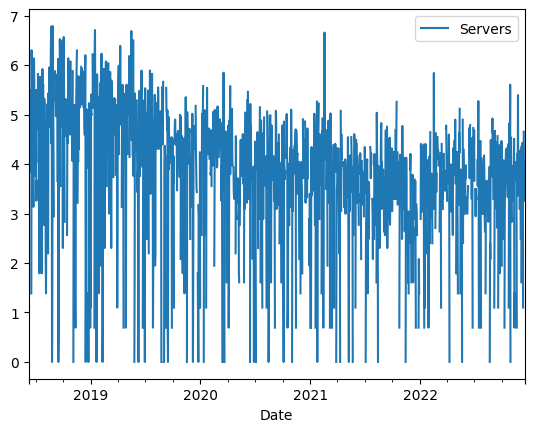

In [5]:
#df=np.log(df)
df.plot()

In [8]:
msk = (df.index < df.index[-30])
df_train = df[msk].copy()
df_test = df[~msk].copy()

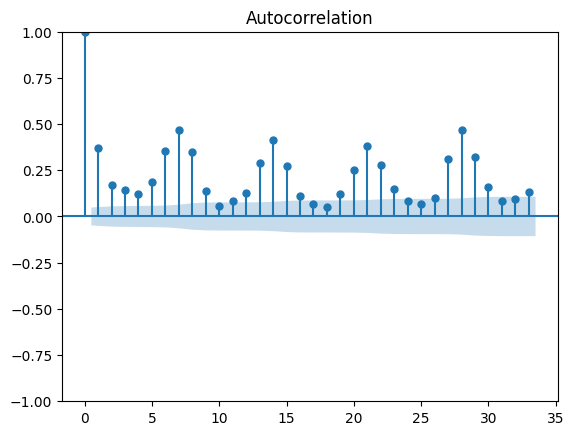

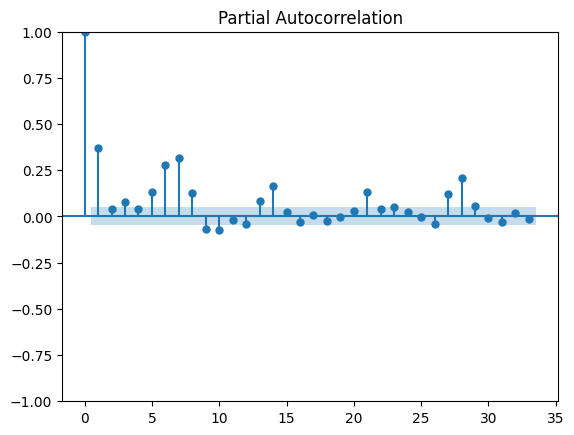

In [9]:
#ACF plot and PACF plot

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_original = plot_acf(df_train)

pacf_original = plot_pacf(df_train)

In [10]:
#ADF test
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df_train)
print(f'p-value: {adf_test[1]}')
#cannot reject Ho

p-value: 0.0038419078393126735


In [14]:
#transform to stationary
#df_train_diff = df_train.diff().dropna()
#df_train_diff.plot()

In [15]:
#acf_diff = plot_acf(df_train_diff)

#pacf_diff = plot_pacf(df_train_diff)

In [16]:
#adf_test = adfuller(df_train_diff)
#print(f'p-value: {adf_test[1]}')

In [17]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_train, order=(2,1,0))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                Servers   No. Observations:                 1622
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -9836.954
Date:                Thu, 22 Feb 2024   AIC                          19679.907
Time:                        19:40:39   BIC                          19696.079
Sample:                    06-08-2018   HQIC                         19685.908
                         - 11-15-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4413      0.012    -38.264      0.000      -0.464      -0.419
ar.L2         -0.2878      0.010    -27.787      0.000      -0.308      -0.267
sigma2      1.094e+04    163.745     66.781      0.0

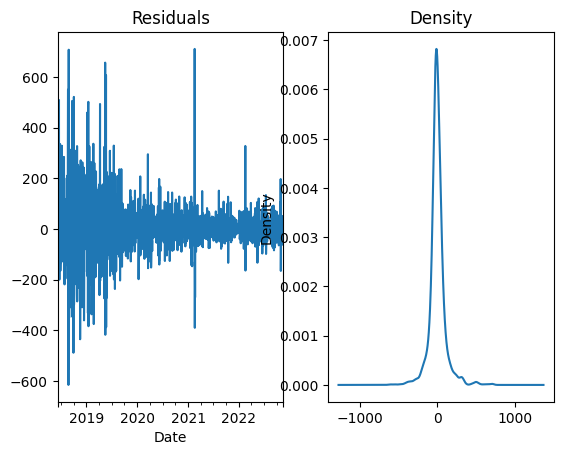

In [18]:
import matplotlib.pyplot as plt
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

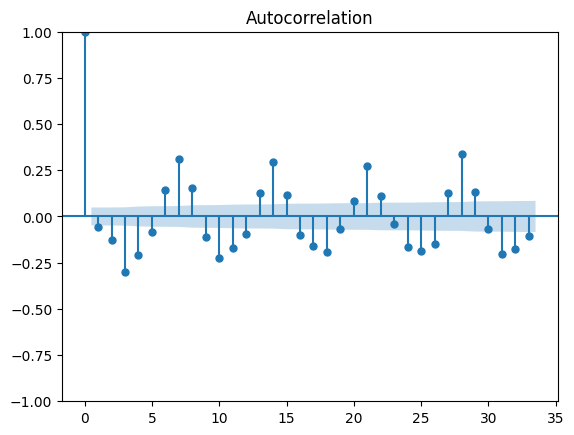

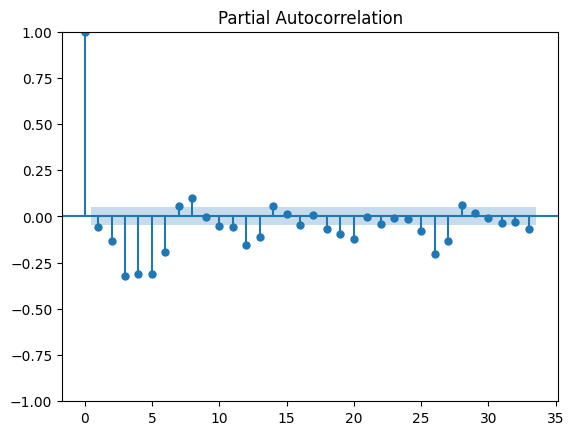

In [19]:
acf_res = plot_acf(residuals)

pacf_res = plot_pacf(residuals)

<Axes: xlabel='Date'>

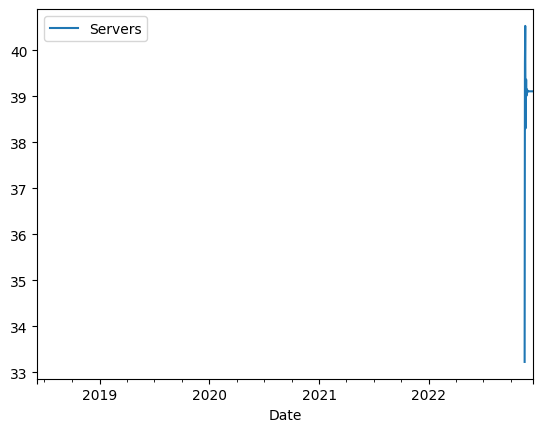

In [24]:
servers_test = model_fit.forecast(len(df_test))

df['Servers'] = [None]*len(df_train) + list(servers_test)

df.plot()

In [26]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.4 MB/s eta 0:00:00


In [27]:
import pmdarima as pm
auto_arima = pm.auto_arima(df_train, stepwise=False, seasonal=False)
auto_arima

ARIMA(order=(2, 1, 3), scoring_args={}, suppress_warnings=True)

In [28]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1622
Model:               SARIMAX(2, 1, 3)   Log Likelihood               -9471.101
Date:                Thu, 22 Feb 2024   AIC                          18956.201
Time:                        19:48:02   BIC                          18993.937
Sample:                    06-08-2018   HQIC                         18970.205
                         - 11-15-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0594      0.113     -0.524      0.600      -0.281       0.163
ar.L1          1.2461      0.002    602.176      0.000       1.242       1.250
ar.L2         -0.9959      0.002   -460.179      0.000      -1.000      -0.992
ma.L1         -2.1736      0.008   -256.178      0.000      -2.190      -2.157
ma.L2          2.1174      0.015    140.223      0.000       2.088       2.147
ma.L3         -0.9111      0.010    -93.078      0.000      -0.930      -0.892
sigma2      7894.4484    140.609     56.145      0.000    7618.860    8170.037
===================================================================================
Ljung-Box (L1) (Q):                   3.00   Jarque-Bera (JB):             27720.26
Prob(Q):                              0.08   Prob(JB):                         0.00
Heteroskedasticity (H):               0.07   Skew:                             3.19
Prob(H) (two-sided):                  0.00   Kurtosis:                        22.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Date'>

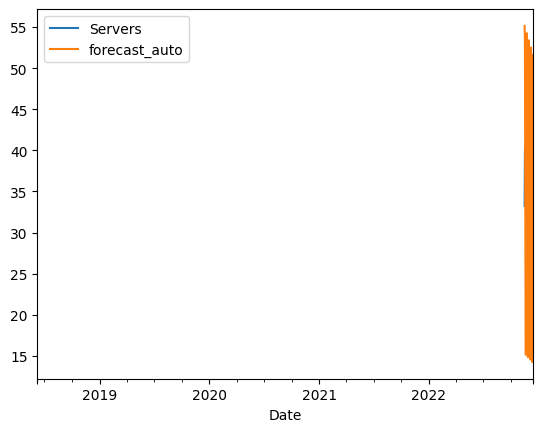

In [29]:
forecast_test_auto = auto_arima.predict(n_periods=len(df_test))
df['forecast_auto'] = [None]*len(df_train) + list(forecast_test_auto)

df.plot()